# Word2Vec

In [1]:
num_threads = 4
w2vType = 'Word2Vec' # or Word2Vec 'FastText'
n_dim = 100
embed_name = '{}{}d'.format(w2vType, n_dim)
vocab_name = 'vocab.json'
min_count = 3
matrix_name = 'wv_matrix{}d'.format(n_dim)
#filename = 'mlds_hw2_2_data/clr_conversation.txt'

In [2]:
import json
import pandas as pd
from gensim.models import Word2Vec, KeyedVectors, FastText
from tqdm import tqdm_notebook as tqdm
import numpy as np
import os

In [3]:
BOS = '<bos>'
EOS = '<eos>'
PAD = '<pad>'
UNK = '<unk>'
MAX_Q_LEN = 10
MAX_A_LEN = 10

In [4]:
sents = []
def loadsents(name):
    with open(name, 'r', encoding='utf-8') as f:
        for s in f:
            if s is not "+++$+++":
                sents.append([BOS] + s.split() + [EOS] + [PAD])
#loadsents(filename)
#sents[0]

In [5]:
for root, dirs, files in os.walk("../week3/"):
    for _dir in dirs:
        if(_dir.isnumeric()):
            dir_name = os.path.join(root, _dir);
            for f in os.listdir(dir_name):
                if(f.find('ipynb') == -1):
                    filename = os.path.join(dir_name, f)
                    loadsents(filename)
                

In [6]:
from gensim.models.callbacks import CallbackAny2Vec
class EpochLogger(CallbackAny2Vec):
    '''Callback to log information about training'''
    def __init__(self):
        self.epoch = 0

    def on_epoch_begin(self, model):
        print("Epoch #{} start".format(self.epoch))

    def on_epoch_end(self, model):
        print("Epoch #{} end".format(self.epoch))
        self.epoch += 1

In [7]:
epoch_logger = EpochLogger()
if w2vType == 'FastText':
    model = FastText(size=n_dim, window=5, min_count=min_count, workers=num_threads, callbacks=[epoch_logger])
else:
    model = Word2Vec(size=n_dim, window=5, min_count=min_count, workers=num_threads, callbacks=[epoch_logger])

model.build_vocab(sents)
total_examples = model.corpus_count
model.train(sents, total_examples=total_examples, epochs=5)

Epoch #0 start
Epoch #0 end
Epoch #1 start
Epoch #1 end
Epoch #2 start
Epoch #2 end
Epoch #3 start
Epoch #3 end
Epoch #4 start
Epoch #4 end


(3350459, 5455625)

# 測試

In [8]:
word = 'patient'
print(word)
print(model.wv.similar_by_word(word))

patient
[('son', 0.9342567920684814), ("patient's", 0.9316206574440002), ('daughter', 0.9199328422546387), ('well', 0.9155193567276001), ('time', 0.908299446105957), ('sister', 0.9080711603164673), ('chemotherapy.', 0.9053139686584473), ('his', 0.9044307470321655), ('黃懷正', 0.9039087891578674), ('made', 0.9020665884017944)]


# 假設用藥與病患身體器官的疾病有關，且該器官會影響病患生命週期

In [9]:
df = pd.read_pickle("../week5_6_7/id_life_med")
df

,life span,frequent medicine
1,46,H
10,34,m
100,16,C
101,14,C
102,27,po
103,19,m
104,1,F
105,8,C
106,127,m
107,15,F


In [10]:
with open("../week4/medicines_dict.json") as f:
    medicines_dict = json.load(f) 

with open("../week4/medicines_abb_map.json") as f:
    medicines_abb_map = json.load(f) 

# 查看每個藥關聯性最大的字

In [11]:
effective = []
for med in medicines_dict:
    try:
        print(med)
        print(model.wv.similar_by_word(med))
        effective.append(med)
    except KeyError:
        print("not in vocab")
    print("")
        

EG abb
not in vocab

ABG
[('mildly', 0.9366042613983154), ('diffusely', 0.9264944195747375), ('12/11', 0.9196786880493164), ('PR', 0.919341504573822), ('7/20', 0.9190382957458496), ('distention', 0.9177038073539734), ('leukocytosis,', 0.9115965366363525), ('UF:', 0.9112029671669006), ('lactate', 0.9109362363815308), ('fat', 0.9105842709541321)]

ACE
not in vocab

ACTH
[('5.34', 0.993037760257721), ('sensation(-)', 0.9920822381973267), ('19.30', 0.9904358386993408), ('[0443]', 0.9893457293510437), ('T-bil=12.91,', 0.9891171455383301), ('3.03', 0.9890547394752502), ('-6.3', 0.9888592958450317), ('08:31', 0.9879261255264282), ('LA:', 0.987869918346405), ('4.09', 0.9877932071685791)]

ADH
not in vocab

AED
[('PPI', 0.95149827003479), ('diet', 0.9456900358200073), ('abx', 0.9414143562316895), ('wet', 0.9399217963218689), ('daptomycin', 0.9350258708000183), ('G-CSF', 0.9343160390853882), ('teicoplanin', 0.9336625933647156), ('titrate', 0.9305151104927063), ('Taper', 0.9303082823753357), ('mi

In [12]:
print(effective)

['ABG', 'ACTH', 'AED', 'ALP', 'ALT', 'AST', 'bid', 'BP', 'BUN', 'C', 'Ca', 'CBC', 'CK', 'Cl', 'cm', 'CNS', 'CO2', 'COPD', 'CPR', 'CSF', 'CT', 'DNA', 'ECG', 'EEG', 'EGD', 'ENT', 'ERCP', 'ESR', 'F', 'G', 'GI', 'GVHD', 'G6PD', 'GU', 'Hb', 'HCl', 'HCO3', 'HIV', 'ICU', 'IgA', 'INR', 'IU', 'IV', 'K', 'kg', 'L', 'LDH', 'M', 'm', 'MCH', 'MCHC', 'MCV', 'mEq', 'Mg', 'mg', 'MI', 'MIC', 'mL', 'mm', 'MRI', 'N', 'Na', 'NaCl', 'ng', 'O2', 'P', 'PCR', 'PET', 'pg', 'pH', 'PMN', 'po', 'PPD', 'ppm', 'prn', 'PT', 'PTT', 'RA', 'RBC', 'RNA', 'sc', 'SI', 'SLE', 'TB', 'TIBC', 'tid', 'TPN', 'URI', 'UTI', 'WBC', 'WHO', 'wt']


# 用爬蟲找出人體器官

In [13]:
import requests
url = "http://www.vhct.gov.tw/index.php?mo=SitePage&ac=sitepage_show&pgsn=92"
header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

r = requests.get(url, headers=header)
organ_table = pd.read_html(r.text)



In [14]:
print(organ_table[0])

            0                                                  1
0         NaN                                                NaN
1         中文名                                                英文名
2        人體器官                               Organs of Human Body
3          頭部                                               Head
4          頭髮                                   Hair of the head
5         後頭部                                   Back of the head
6           臉                                               Face
7           額  Forehead, frontal emninence, frontal bump, sup...
8           頰                                              Cheek
9           口                                              Mouth
10          頦                                               Chin
11          眼                                                Eye
12          鼻                                               Nose
13          眉                                            Eyebrow
14        上眼瞼            

In [15]:
organs = []
for ct,i in enumerate(list(organ_table[0].loc[: ,0])):
        if(ct>1):
            organs.append(i)

In [16]:
print(organs)

['人體器官', '頭部', '頭髮', '後頭部', '臉', '額', '頰', '口', '頦', '眼', '鼻', '眉', '上眼瞼', '下眼瞼', '睫毛', '虹膜', '瞳孔', '眼外肌', '眼球', '晶體狀', '玻璃體', '角膜', '視網膜', '鞏膜', '視神經', '盲點', '鼻唇溝', '人中（上唇中溝）', '頸', '項頸背', '喉（嚨）', '頜，顎', '上頜', '腦', '大腦', '小腦', '耳朵', '外耳', '耳廓', '耳垂', '外耳道', '中耳', '鼓膜', '鼓室', '聽小骨', '錘骨', '砧骨', '鐙骨', '耳咽管（咽鼓管）', '內耳', '半規管', '耳蝸', '前庭', '聽神經', '鼻子', '鼻梁', '鼻孔', '鼻中隔', '鼻腔', '鼻骨', '鼻旁竇', '鼻甲', '鼻後孔', '鼻翼', '鼻道', '鼻毛', '口腔和咽', '上唇', '下唇', '牙齦', '牙', '硬腭', '軟腭', '口角', '懸雍垂（小舌）', '（腭）扁桃體', '咽（峽）', '舌', '喉', '會厭', '聲帶', '聲門', '牙齒', '切齒門齒', '尖牙，犬牙', '雙尖牙，前磨牙，前臼齒', '磨牙，臼齒（後牙）', '乳牙（暫齒）', '智齒', '桓牙', '三尖牙', '牙槽', '牙周膜', '牙骨質', '牙冠', '牙根', '牙釉質', '牙質', '牙髓', '血管和神經', '人體', '肩', '肩胛', '腰', '腋，腋窩', '腋毛', '胸，胸膛', '乳房', '乳頭', '乳暈', '脅', '後臀', '臍', '腹部', '上腹', '下腹', '腹股溝', '屁股', '上臂', '前臂', '肘', '腕', '拳', '大腿', '膝，膝�', '膕窩', '小腿', '腓腸', '手', '拇指', '食指', '中指', '無名指，環指', '小指', '手背', '手掌', '撓（骨）側', '尺（骨）側', '指甲', '指紋', '魚際', '掌紋', '腕骨', '腕關節', '指骨', '指尖', '指關節', '腳，足', '拇指', '第二趾', '第三趾', '第四趾', '小趾', 

# 找出每個藥與哪個器官關聯性最強

In [17]:
ans_relation = {}
for med in effective:
    #print(med)
    best = 0;
    best_organ = "";
    for organ in organs:
        #model.wv.dot(med, )

        try:
            ans = model.similarity(med, organ)
            #print(organ)
            #print(ans)
            if(ans > best):
                best = ans;
                best_organ = organ
        except KeyError:
            pass
        
    ans_relation[med] = best_organ
        


/home/marvin/anaconda3/envs/py37cuda10/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  # Remove the CWD from sys.path while we load stuff.


In [18]:
print(ans_relation)

{'ABG': '白血球', 'ACTH': '紅血球', 'AED': '紅血球', 'ALP': '紅血球', 'ALT': '紅血球', 'AST': '紅血球', 'bid': '眼', 'BP': '白血球', 'BUN': '紅血球', 'C': '紅血球', 'Ca': '紅血球', 'CBC': '紅血球', 'CK': '紅血球', 'Cl': '紅血球', 'cm': '眼', 'CNS': '紅血球', 'CO2': '白血球', 'COPD': '紅血球', 'CPR': '眼', 'CSF': '白血球', 'CT': '白血球', 'DNA': '白血球', 'ECG': '白血球', 'EEG': '白血球', 'EGD': '白血球', 'ENT': '紅血球', 'ERCP': '白血球', 'ESR': '紅血球', 'F': '紅血球', 'G': '眼', 'GI': '白血球', 'GVHD': '紅血球', 'G6PD': '紅血球', 'GU': '白血球', 'Hb': '白血球', 'HCl': '眼', 'HCO3': '紅血球', 'HIV': '白血球', 'ICU': '紅血球', 'IgA': '紅血球', 'INR': '紅血球', 'IU': '眼', 'IV': '眼', 'K': '紅血球', 'kg': '眼', 'L': '紅血球', 'LDH': '紅血球', 'M': '紅血球', 'm': '紅血球', 'MCH': '白血球', 'MCHC': '白血球', 'MCV': '紅血球', 'mEq': '眼', 'Mg': '紅血球', 'mg': '眼', 'MI': '', 'MIC': '白血球', 'mL': '眼', 'mm': '眼', 'MRI': '眼', 'N': '紅血球', 'Na': '紅血球', 'NaCl': '眼', 'ng': '紅血球', 'O2': '白血球', 'P': '紅血球', 'PCR': '白血球', 'PET': '眼', 'pg': '紅血球', 'pH': '眼', 'PMN': '眼', 'po': '白血球', 'PPD': '眼', 'ppm': '眼', 'prn': '白血球', 'PT': '紅血球', 'PTT': '紅血

# 得到的結論為：進安寧病房者通常為紅血球，白血球，眼睛有問題

In [19]:
with open("../week5_6_7/med_ct.json") as f:
    med_ct = json.load(f) 

In [20]:
import matplotlib.pyplot as plt


# 承上之前的資料，查詢用藥最高對應到的器官

<BarContainer object of 7 artists>

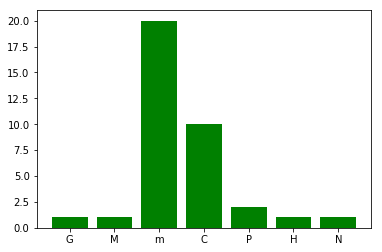

In [21]:
plt.bar(med_ct.keys(), med_ct.values(), 0.8, color='g')

In [22]:
for med in med_ct:
    try:
        print(med,ans_relation[med])
    except KeyError:
        pass

G 眼
M 紅血球
m 紅血球
C 紅血球
P 紅血球
N 紅血球


# 其中又以m,C為最大的兩宗，白血球有問題最明顯